# Best Neighborhood in Pittsburgh

Team name: Squirrel Kings

Group Members: Austin Gohn and Sreekar Pamujula

The following datasets were used to make this project:  
https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367

https://data.wprdc.org/dataset/city-traffic-signs/resource/d078a6b5-83a3-4723-a3a9-5371cfe1cc0c

https://data.wprdc.org/dataset/pittsburgh-american-community-survey-2015-school-enrollment/resource/eb1f8714-e0eb-4614-acfe-dfe0ebab942f


## Introduction

When coming up with how to decide what the best neighborhood in Pittsburgh is, we decided to look at the best neighborhood for a child to play in. The three factors we will take into consideration when considering this is the safety of the child, the number of other kids in the neighborhood, and the equipment they can use to play. The three submetrics will be the number of street signs per neighborhood to determine safety, the ratio of kids to the overall population to determine the number of kids, and the number of playgrounds per neighborhood to determine the equipment they can use to play. These three factors will decide which neighborhood provides the safest and most fun neighborhood for a kid to play in.

Let's go ahead and start by importing pandas and numpy...

In [1]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

## Examining Playground Data

Let's start by looking at the number of playgrounds per neighborhood. The more playgrounds a neighborhood has, the more fun a child can have in that neighborhood. We can begin by reading in the data from the playground csv file...

In [2]:
#Read in Playground data from file
playground_data = pd.read_csv("Playgrounds.csv")
#Show playground data set
playground_data

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1199980206,Phillips Lower Playground,NaN,NaN,NaN,NaN,NaN,Carrick,4,29,42003290400,3,29,3,4-23,40.388144,-79.990309
121,2108783707,Duncan Park Playground,NaN,NaN,Duncan Park,DUNCAN ST,NaN,Upper Lawrenceville,7,10,42003101100,2,10,2,3-5,40.480246,-79.948461
122,675610013,McKinley Upper Playground,NaN,NaN,McKinley Park,MICHIGAN ST,NaN,Beltzhoover,4,18,42003562400,5,18,3,4-16,40.415730,-80.002950
123,1683700344,Liberty Green Playground,NaN,NaN,Liberty Green Park,NaN,NaN,East Liberty,9,11,42003111500,2,11,5,3-10,40.462951,-79.919097


Now that we have imported all the playground data, we only need to look at the necessary parts. The parts that are important in determining which neighborhood has the most playgrounds are the park the playground is located in and the neighborhood where the playground is located. We can look at only these columns by using .loc

In [3]:
#Pulls only the data we need from playground_data
playground_data = playground_data.loc[:, ["park", "neighborhood"]]
#Displays the new playground_data
playground_data

,park,neighborhood
0,Able Long Park,Beechview
1,Albert Turk Graham Park,Crawford-Roberts
2,Alpine Gardens Park,Central Northside
3,Alton Park,Beechview
4,Ammon Park,Bedford Dwellings
...,...,...
120,NaN,Carrick
121,Duncan Park,Upper Lawrenceville
122,McKinley Park,Beltzhoover
123,Liberty Green Park,East Liberty


Now that we have only the necessary data to analyze the number of playgrounds, we can use value_counts to count the number of
times each neighborhood appears in the data. Each time a neighborhood appears in the data that means there is a playground there. So value_counts will find the number of playgrounds located in each neighborhood. We can then convert that to a data frame to make it easier to use.

In [4]:
#Finds the number of playgrounds in each neighborhood and stores it as a data frame
num_playgrounds = playground_data.value_counts("neighborhood")[:].to_frame()
#Displays the number of playgrounds in each neighborhood
num_playgrounds

,0
neighborhood,
Squirrel Hill South,8
Beechview,5
South Side Slopes,5
Allegheny Center,4
Beltzhoover,4
...,...
New Homestead,1
Oakwood,1
Perry North,1


Looking at the data above, we can see that there are many neighborhoods that have only one playground. Since we are looking for the neighborhoods that have the most playgrounds, we can narrow down our data to neighborhoods that have at least 3 or more playgrounds...

In [5]:
# Gets rid of the neighborhoods that don't have at least three playgrounds
num_playgrounds = num_playgrounds[num_playgrounds[0]>=3]
# Displays the number of playgrounds per neighborhood
num_playgrounds

,0
neighborhood,
Squirrel Hill South,8
Beechview,5
South Side Slopes,5
Allegheny Center,4
Beltzhoover,4
Highland Park,4
Sheraden,4
Mount Washington,3
Elliott,3


That looks much better! Now that we finally have the neighborhoods that contain the most playgrounds we can use this data to create a bar graph and better visualize our data. 

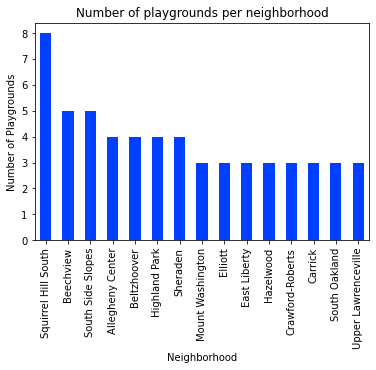

In [6]:
# Sets the style
plt.style.use('seaborn-bright')
# Plots the data and sets labels
num_playgrounds.plot(kind="bar", title = "Number of playgrounds per neighborhood", xlabel = "Neighborhood", 
                     ylabel = "Number of Playgrounds", legend =False)


Looking at the graph above, it is clear which neighborhood has the most playgrounds. That neighborhood is Squirrel Hill South with 8 playgrounds. Beachview and South Side Slopes come in second with 5 playgrounds. Let's go ahead and keep track of this by giving points to each neighborhood. The neighborhood with the most playgrounds will get 5 points, 2nd place will get 4, and so on down to one. Since there are so many neighborhoods with the same amount of playgrounds we will only give points to neighborhoods with 3 or more playgrounds.

In [7]:
#Creates a dictionary to keep track of points
points = {}

#Adds each neighborhood and the number of points recieved
points['Squirrel Hill South'] = 5
points['Beechview'] = 4
points['South Side Slopes'] = 4
points['Allegheny Center'] = 3
points['Beltzhoover'] = 3
points['Highland Park'] = 3
points['Sheraden'] = 3
points['Mount Washington'] = 2
points['Elliott'] = 2
points['East Liberty'] = 2
points['Hazelwood'] = 2
points['Crawford-Roberts'] = 2
points['Carrick'] = 2
points['South Oakland'] = 2
points['Upper Lawrenceville'] = 2

#Displays points
points


{'Squirrel Hill South': 5,
 'Beechview': 4,
 'South Side Slopes': 4,
 'Allegheny Center': 3,
 'Beltzhoover': 3,
 'Highland Park': 3,
 'Sheraden': 3,
 'Mount Washington': 2,
 'Elliott': 2,
 'East Liberty': 2,
 'Hazelwood': 2,
 'Crawford-Roberts': 2,
 'Carrick': 2,
 'South Oakland': 2,
 'Upper Lawrenceville': 2}

We can use this dictionary to keep a running number of the amount of points each nieghborhood has. After analyzing the first dataset, Squirrel Hill South is winning the best neighborhood for a child to play in with 5 points.

## Examining the Child Population

Now we will look at the population of children in each neighborhood. The more children there are in a neighborhood, the more fun a child will have. In order to look at this we will look at school enrollment data. We will base the child population on the number of children enrolled in school. Let's start by importing the data...

In [8]:
#Read in children data from file
data = pd.read_csv("Scool-Enrollment.csv")
#Displays data on screen
data

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Enrolled in school:,Margin of Error; Enrolled in school:,"Estimate; Enrolled in school: - Enrolled in nursery school, preschool","Margin of Error; Enrolled in school: - Enrolled in nursery school, preschool",Estimate; Enrolled in school: - Enrolled in kindergarten,Margin of Error; Enrolled in school: - Enrolled in kindergarten,...,Estimate; Enrolled in school: - Enrolled in grade 11,Margin of Error; Enrolled in school: - Enrolled in grade 11,Estimate; Enrolled in school: - Enrolled in grade 12,Margin of Error; Enrolled in school: - Enrolled in grade 12,"Estimate; Enrolled in school: - Enrolled in college, undergraduate years","Margin of Error; Enrolled in school: - Enrolled in college, undergraduate years",Estimate; Enrolled in school: - Graduate or professional school,Margin of Error; Enrolled in school: - Graduate or professional school,Estimate; Not enrolled in school,Margin of Error; Not enrolled in school
0,Allegheny Center,1,1389.0,193.000000,394.0,120.000000,48.0,29.000000,0.0,10.000000,...,0.0,10.000000,21.0,32.000000,150.0,60.000000,51.0,35.000000,995.0,135.000000
1,Allegheny West,2,343.0,96.000000,61.0,44.000000,0.0,10.000000,0.0,10.000000,...,9.0,12.000000,0.0,10.000000,2.0,4.000000,25.0,22.000000,282.0,74.000000
2,Allentown,3,2520.0,449.503059,965.0,312.800256,19.0,22.825424,23.0,28.722813,...,41.0,53.823787,81.0,72.718636,125.0,87.120606,74.0,101.469207,1555.0,267.807767
3,Arlington,4,1823.0,342.302498,427.0,127.722355,7.0,17.916473,6.0,17.916473,...,37.0,27.000000,17.0,27.856777,142.0,69.231496,16.0,18.493242,1396.0,267.159129
4,Arlington Heights,5,213.0,115.000000,40.0,49.000000,28.0,49.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,12.0,14.000000,0.0,10.000000,173.0,87.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Upper Lawrenceville,87,2662.0,391.154701,625.0,206.211057,82.0,69.455021,18.0,32.264532,...,52.0,45.705580,45.0,46.346521,85.0,53.497664,98.0,57.913729,2037.0,274.100347
87,West End,88,235.0,138.000000,71.0,60.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,71.0,60.000000,0.0,10.000000,164.0,101.000000
88,West Oakland,89,1681.0,280.850494,791.0,229.002183,17.0,20.591260,0.0,14.142136,...,3.0,11.180340,13.0,23.259407,508.0,211.123187,148.0,69.634761,890.0,149.241415
89,Westwood,90,3303.0,370.276923,629.0,189.200951,75.0,56.044625,65.0,61.619802,...,33.0,24.596748,0.0,14.142136,178.0,77.781746,13.0,20.591260,2674.0,256.095685


Now that we have all the data, we can narrow down the data to only the sections that we need. We can start by getting rid of all the sections that don't involve the neighborhood, total population, and estimated children enrolled in school. For this project, we will ignore the margin of error. We will also classify children as anyone enrolled in school from preschool to 12th grade. This means we can get rid of all margin of error columns and any column that involves education above high school.

In [9]:
#Gets rid of all the unneeded data
data = data.drop(["Id", "Margin of Error; Total:","Margin of Error; Enrolled in school:", 
                     "Margin of Error; Enrolled in school: - Enrolled in nursery school, preschool",
                    "Margin of Error; Enrolled in school: - Enrolled in kindergarten",
                    "Margin of Error; Enrolled in school: - Enrolled in grade 1",
                    "Margin of Error; Enrolled in school: - Enrolled in grade 2",
                    "Margin of Error; Enrolled in school: - Enrolled in grade 3",
                    "Margin of Error; Enrolled in school: - Enrolled in grade 4",
                    "Margin of Error; Enrolled in school: - Enrolled in grade 5",
                    "Margin of Error; Enrolled in school: - Enrolled in grade 6",
                    "Margin of Error; Enrolled in school: - Enrolled in grade 7",
                    "Margin of Error; Enrolled in school: - Enrolled in grade 8",
                    "Margin of Error; Enrolled in school: - Enrolled in grade 9",
                    "Margin of Error; Enrolled in school: - Enrolled in grade 10",
                    "Margin of Error; Enrolled in school: - Enrolled in grade 11",
                    "Margin of Error; Enrolled in school: - Enrolled in grade 12",
                    "Estimate; Enrolled in school: - Enrolled in college, undergraduate years",
                     "Margin of Error; Enrolled in school: - Enrolled in college, undergraduate years",
                    "Estimate; Enrolled in school: - Graduate or professional school",
                    "Margin of Error; Enrolled in school: - Graduate or professional school",
                    "Estimate; Not enrolled in school", "Margin of Error; Not enrolled in school",
                    "Estimate; Enrolled in school:"], axis=1 )
#Displays the new data with only the needed parts
data

,Neighborhood,Estimate; Total:,"Estimate; Enrolled in school: - Enrolled in nursery school, preschool",Estimate; Enrolled in school: - Enrolled in kindergarten,Estimate; Enrolled in school: - Enrolled in grade 1,Estimate; Enrolled in school: - Enrolled in grade 2,Estimate; Enrolled in school: - Enrolled in grade 3,Estimate; Enrolled in school: - Enrolled in grade 4,Estimate; Enrolled in school: - Enrolled in grade 5,Estimate; Enrolled in school: - Enrolled in grade 6,Estimate; Enrolled in school: - Enrolled in grade 7,Estimate; Enrolled in school: - Enrolled in grade 8,Estimate; Enrolled in school: - Enrolled in grade 9,Estimate; Enrolled in school: - Enrolled in grade 10,Estimate; Enrolled in school: - Enrolled in grade 11,Estimate; Enrolled in school: - Enrolled in grade 12
0,Allegheny Center,1389.0,48.0,0.0,46.0,0.0,0.0,33.0,0.0,27.0,0.0,2.0,6.0,10.0,0.0,21.0
1,Allegheny West,343.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,9.0,0.0
2,Allentown,2520.0,19.0,23.0,120.0,55.0,96.0,57.0,60.0,36.0,44.0,53.0,20.0,61.0,41.0,81.0
3,Arlington,1823.0,7.0,6.0,5.0,24.0,36.0,9.0,19.0,18.0,8.0,31.0,40.0,12.0,37.0,17.0
4,Arlington Heights,213.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Upper Lawrenceville,2662.0,82.0,18.0,0.0,29.0,34.0,50.0,12.0,35.0,13.0,18.0,31.0,23.0,52.0,45.0
87,West End,235.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,West Oakland,1681.0,17.0,0.0,22.0,0.0,7.0,0.0,6.0,11.0,9.0,18.0,0.0,29.0,3.0,13.0
89,Westwood,3303.0,75.0,65.0,22.0,10.0,55.0,0.0,53.0,21.0,34.0,10.0,35.0,25.0,33.0,0.0


Now that we removed all the columns we do not need, we can find the total number of children in each neighborhood. We can do this by summing up each column that estimates the number of children enrolled in that grade and creating a new column called "Total Children."

In [10]:
#Sums up all of the columns and adds them to a new column named, "Total Children"
data["Total Children"] = data.loc[0:, ["Estimate; Enrolled in school: - Enrolled in nursery school, preschool",
                                       "Estimate; Enrolled in school: - Enrolled in kindergarten",
                                       "Estimate; Enrolled in school: - Enrolled in grade 1",
                                       "Estimate; Enrolled in school: - Enrolled in grade 2",
                                       "Estimate; Enrolled in school: - Enrolled in grade 3",
                                       "Estimate; Enrolled in school: - Enrolled in grade 4",
                                       "Estimate; Enrolled in school: - Enrolled in grade 5",
                                       "Estimate; Enrolled in school: - Enrolled in grade 6",
                                       "Estimate; Enrolled in school: - Enrolled in grade 7",
                                       "Estimate; Enrolled in school: - Enrolled in grade 8",
                                       "Estimate; Enrolled in school: - Enrolled in grade 9",
                                       "Estimate; Enrolled in school: - Enrolled in grade 10",
                                       "Estimate; Enrolled in school: - Enrolled in grade 11",
                                       "Estimate; Enrolled in school: - Enrolled in grade 12"]].sum(axis = 1)
#Displays the data with the new column
data

,Neighborhood,Estimate; Total:,"Estimate; Enrolled in school: - Enrolled in nursery school, preschool",Estimate; Enrolled in school: - Enrolled in kindergarten,Estimate; Enrolled in school: - Enrolled in grade 1,Estimate; Enrolled in school: - Enrolled in grade 2,Estimate; Enrolled in school: - Enrolled in grade 3,Estimate; Enrolled in school: - Enrolled in grade 4,Estimate; Enrolled in school: - Enrolled in grade 5,Estimate; Enrolled in school: - Enrolled in grade 6,Estimate; Enrolled in school: - Enrolled in grade 7,Estimate; Enrolled in school: - Enrolled in grade 8,Estimate; Enrolled in school: - Enrolled in grade 9,Estimate; Enrolled in school: - Enrolled in grade 10,Estimate; Enrolled in school: - Enrolled in grade 11,Estimate; Enrolled in school: - Enrolled in grade 12,Total Children
0,Allegheny Center,1389.0,48.0,0.0,46.0,0.0,0.0,33.0,0.0,27.0,0.0,2.0,6.0,10.0,0.0,21.0,193.0
1,Allegheny West,343.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,9.0,0.0,34.0
2,Allentown,2520.0,19.0,23.0,120.0,55.0,96.0,57.0,60.0,36.0,44.0,53.0,20.0,61.0,41.0,81.0,766.0
3,Arlington,1823.0,7.0,6.0,5.0,24.0,36.0,9.0,19.0,18.0,8.0,31.0,40.0,12.0,37.0,17.0,269.0
4,Arlington Heights,213.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Upper Lawrenceville,2662.0,82.0,18.0,0.0,29.0,34.0,50.0,12.0,35.0,13.0,18.0,31.0,23.0,52.0,45.0,442.0
87,West End,235.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,West Oakland,1681.0,17.0,0.0,22.0,0.0,7.0,0.0,6.0,11.0,9.0,18.0,0.0,29.0,3.0,13.0,135.0
89,Westwood,3303.0,75.0,65.0,22.0,10.0,55.0,0.0,53.0,21.0,34.0,10.0,35.0,25.0,33.0,0.0,438.0


Now that we have the total number of children in each neighborhood, let's take a look at a graph of this data. Let's start by narrowing down the data to the 10 neighborhoods with the most children since we are looking for the neighborhood with the most...

In [11]:
#Sorts the data by the total number of children per neighborhood
data = data.sort_values("Total Children", ascending =False)
#Assigns the 10 neighborhoods with the most children to child_population
child_population = data.head(10)
#Displays the child population
child_population

,Neighborhood,Estimate; Total:,"Estimate; Enrolled in school: - Enrolled in nursery school, preschool",Estimate; Enrolled in school: - Enrolled in kindergarten,Estimate; Enrolled in school: - Enrolled in grade 1,Estimate; Enrolled in school: - Enrolled in grade 2,Estimate; Enrolled in school: - Enrolled in grade 3,Estimate; Enrolled in school: - Enrolled in grade 4,Estimate; Enrolled in school: - Enrolled in grade 5,Estimate; Enrolled in school: - Enrolled in grade 6,Estimate; Enrolled in school: - Enrolled in grade 7,Estimate; Enrolled in school: - Enrolled in grade 8,Estimate; Enrolled in school: - Enrolled in grade 9,Estimate; Enrolled in school: - Enrolled in grade 10,Estimate; Enrolled in school: - Enrolled in grade 11,Estimate; Enrolled in school: - Enrolled in grade 12,Total Children
13,Brookline,12777.0,219.0,125.0,131.0,179.0,174.0,128.0,141.0,109.0,133.0,174.0,136.0,168.0,122.0,116.0,2055.0
77,Squirrel Hill South,15510.0,334.0,205.0,186.0,129.0,192.0,126.0,145.0,99.0,103.0,91.0,72.0,74.0,119.0,167.0,2042.0
15,Carrick,9825.0,111.0,68.0,185.0,182.0,124.0,104.0,144.0,95.0,143.0,181.0,58.0,141.0,74.0,71.0,1681.0
76,Squirrel Hill North,11072.0,194.0,59.0,111.0,20.0,145.0,108.0,131.0,72.0,83.0,70.0,22.0,82.0,61.0,58.0,1216.0
69,Sheraden,5397.0,151.0,43.0,43.0,181.0,65.0,131.0,141.0,36.0,31.0,31.0,32.0,139.0,37.0,127.0,1188.0
43,Knoxville,3938.0,102.0,67.0,93.0,102.0,25.0,170.0,27.0,34.0,143.0,133.0,99.0,50.0,88.0,33.0,1166.0
12,Brighton Heights,7118.0,157.0,102.0,71.0,75.0,22.0,78.0,109.0,80.0,56.0,60.0,31.0,85.0,131.0,56.0,1113.0
39,Highland Park,6551.0,153.0,107.0,45.0,32.0,132.0,41.0,41.0,46.0,43.0,99.0,51.0,102.0,133.0,11.0,1036.0
7,Beechview,7770.0,145.0,47.0,51.0,211.0,26.0,62.0,49.0,53.0,74.0,67.0,45.0,78.0,26.0,80.0,1014.0
40,Homewood North,3055.0,145.0,67.0,44.0,91.0,103.0,81.0,67.0,68.0,75.0,57.0,20.0,80.0,11.0,70.0,979.0


Now that we have the 10 neighborhoods with the most children, let's take a look at a graph of this data...

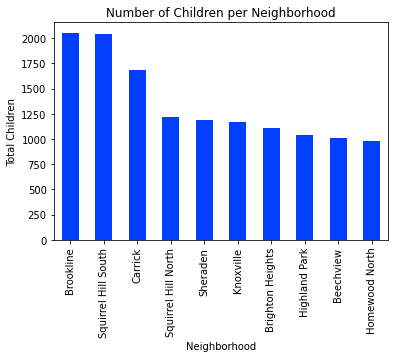

In [12]:
#Creates a bar graph of the data with the proper labels
child_population.plot(x = "Neighborhood", y = "Total Children", kind="bar", ylabel = "Total Children", 
                      title = "Number of Children per Neighborhood", legend = False)

Looking at the graph it is clear that both Brookline and Squirrel Hill South have the most children in them. Carrick comes in third with the third largest child population. However, a better way to look at this data would be to look at which neighborhood has the largest percentage of children. Let's go ahead and add another column to the table that shows the percentage of the overall population that are children. We can do this by taking the "Total Children" column and dividing it by the "Estimated; Total:" column (overall population of the neighborhood) and then multiplying that by 100.

In [13]:
#Creates a new column that shows the percent children by dividing "Total Children" by "Estimate; Total:" and multiplying by 100
data["Percent Children"] = data["Total Children"]/data["Estimate; Total:"] *100
#Displays the data with the new column
data

,Neighborhood,Estimate; Total:,"Estimate; Enrolled in school: - Enrolled in nursery school, preschool",Estimate; Enrolled in school: - Enrolled in kindergarten,Estimate; Enrolled in school: - Enrolled in grade 1,Estimate; Enrolled in school: - Enrolled in grade 2,Estimate; Enrolled in school: - Enrolled in grade 3,Estimate; Enrolled in school: - Enrolled in grade 4,Estimate; Enrolled in school: - Enrolled in grade 5,Estimate; Enrolled in school: - Enrolled in grade 6,Estimate; Enrolled in school: - Enrolled in grade 7,Estimate; Enrolled in school: - Enrolled in grade 8,Estimate; Enrolled in school: - Enrolled in grade 9,Estimate; Enrolled in school: - Enrolled in grade 10,Estimate; Enrolled in school: - Enrolled in grade 11,Estimate; Enrolled in school: - Enrolled in grade 12,Total Children,Percent Children
13,Brookline,12777.0,219.0,125.0,131.0,179.0,174.0,128.0,141.0,109.0,133.0,174.0,136.0,168.0,122.0,116.0,2055.0,16.083588
77,Squirrel Hill South,15510.0,334.0,205.0,186.0,129.0,192.0,126.0,145.0,99.0,103.0,91.0,72.0,74.0,119.0,167.0,2042.0,13.165700
15,Carrick,9825.0,111.0,68.0,185.0,182.0,124.0,104.0,144.0,95.0,143.0,181.0,58.0,141.0,74.0,71.0,1681.0,17.109415
76,Squirrel Hill North,11072.0,194.0,59.0,111.0,20.0,145.0,108.0,131.0,72.0,83.0,70.0,22.0,82.0,61.0,58.0,1216.0,10.982659
69,Sheraden,5397.0,151.0,43.0,43.0,181.0,65.0,131.0,141.0,36.0,31.0,31.0,32.0,139.0,37.0,127.0,1188.0,22.012229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,North Shore,205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,12.0,5.853659
21,Chateau,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
71,South Shore,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
87,West End,235.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


Now that we have the percentage of the population that are children, let's go ahead and sort this by the percentage of children in descending order...

In [14]:
#Sorts the data by the percent of the population that are children
data = data.sort_values("Percent Children", ascending = False)

Now let's go ahead and take a look at which neighborhoods have the greatest percentage of children. For this, we only need to look at the 10 neighborhoods with the largest child population. We can assign percent_children to the 10 neighborhoods with the largest child population as shown below.

In [15]:
#Assigns the 10 neighborhoods with the largest percentage of children to percent_children
percent_children = data.head(10)
#Displays percent_children
percent_children

,Neighborhood,Estimate; Total:,"Estimate; Enrolled in school: - Enrolled in nursery school, preschool",Estimate; Enrolled in school: - Enrolled in kindergarten,Estimate; Enrolled in school: - Enrolled in grade 1,Estimate; Enrolled in school: - Enrolled in grade 2,Estimate; Enrolled in school: - Enrolled in grade 3,Estimate; Enrolled in school: - Enrolled in grade 4,Estimate; Enrolled in school: - Enrolled in grade 5,Estimate; Enrolled in school: - Enrolled in grade 6,Estimate; Enrolled in school: - Enrolled in grade 7,Estimate; Enrolled in school: - Enrolled in grade 8,Estimate; Enrolled in school: - Enrolled in grade 9,Estimate; Enrolled in school: - Enrolled in grade 10,Estimate; Enrolled in school: - Enrolled in grade 11,Estimate; Enrolled in school: - Enrolled in grade 12,Total Children,Percent Children
40,Homewood North,3055.0,145.0,67.0,44.0,91.0,103.0,81.0,67.0,68.0,75.0,57.0,20.0,80.0,11.0,70.0,979.0,32.045827
2,Allentown,2520.0,19.0,23.0,120.0,55.0,96.0,57.0,60.0,36.0,44.0,53.0,20.0,61.0,41.0,81.0,766.0,30.396825
58,Northview Heights,1454.0,28.0,57.0,25.0,70.0,36.0,27.0,22.0,36.0,38.0,32.0,10.0,9.0,36.0,9.0,435.0,29.917469
43,Knoxville,3938.0,102.0,67.0,93.0,102.0,25.0,170.0,27.0,34.0,143.0,133.0,99.0,50.0,88.0,33.0,1166.0,29.608939
29,Elliott,2468.0,60.0,38.0,46.0,26.0,56.0,35.0,37.0,35.0,98.0,20.0,122.0,20.0,67.0,64.0,724.0,29.335494
6,Bedford Dwellings,1251.0,28.0,57.0,28.0,0.0,22.0,0.0,21.0,13.0,9.0,43.0,55.0,3.0,22.0,12.0,313.0,25.019984
11,Bon Air,874.0,0.0,14.0,14.0,0.0,14.0,7.0,14.0,35.0,26.0,0.0,13.0,0.0,30.0,49.0,216.0,24.713959
78,St. Clair,261.0,16.0,0.0,21.0,10.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,4.0,61.0,23.371648
52,Mount Oliver Borough,3288.0,28.0,79.0,17.0,83.0,16.0,78.0,40.0,66.0,57.0,0.0,97.0,50.0,12.0,104.0,727.0,22.110706
69,Sheraden,5397.0,151.0,43.0,43.0,181.0,65.0,131.0,141.0,36.0,31.0,31.0,32.0,139.0,37.0,127.0,1188.0,22.012229


Let's go ahead and graph this data now to get a better visualization...

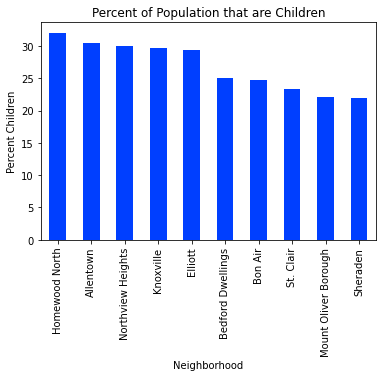

In [16]:
#Creates a bar graph showing the percentage of the overall population that are children
percent_children.plot(x = "Neighborhood", y = "Percent Children", kind = "bar", ylabel = "Percent Children",
                     title = "Percent of Population that are Children", legend = False)

Looking at the graph above, it is clear that Homewood North has the highest percentage of children with slightly over 30% of the population there being children. Other neighborhoods that come close to 30% include Allentown, Northview Heights, Knoxville, and Elliott.

Using the same point system we used before with 1st place getting 5 points, 4th 4 points, and so on, we can add neighborhoods and points to our dictionary. The first 4 neighborhoods are not yet in our dictionary so we will add them in with their corresponding point value. For Elliott, we will add one point to its total since it already exists in our dictionary.

In [17]:
#Adds neighborhoods and points to the dictonary
points['Homewood North'] = 5
points['Allentown'] = 4
points['Northview Heights'] = 3
points['Knoxville'] = 2
points['Elliott'] += 1

#Displays the points dictionary
points

{'Squirrel Hill South': 5,
 'Beechview': 4,
 'South Side Slopes': 4,
 'Allegheny Center': 3,
 'Beltzhoover': 3,
 'Highland Park': 3,
 'Sheraden': 3,
 'Mount Washington': 2,
 'Elliott': 3,
 'East Liberty': 2,
 'Hazelwood': 2,
 'Crawford-Roberts': 2,
 'Carrick': 2,
 'South Oakland': 2,
 'Upper Lawrenceville': 2,
 'Homewood North': 5,
 'Allentown': 4,
 'Northview Heights': 3,
 'Knoxville': 2}

## Examining Traffic Sign Data

Finally, we will look at the number of traffic signs per neighborhood. According to the CDC, car accidents are the leading cause of death in the United States for people aged 1-54. The more traffic signs that are in a neighborhood, the safer the neighborhood is for a child to play in.

We'll start by looking at the number of traffic signs in each neighborhood.

We can now read in the data from the traffic sign csv file...

In [18]:
#Read in Traffic_Signs data from file
import pandas as pd
traffic_data = pd.read_csv("Traffic_Signs.csv")
#Show Traffic_Signs data
traffic_data

,id,mutcd_code,address_number,street,city,mounting_fixture,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1673225887,R1-1,900,California Ave,Pittsburgh,Wood Pole,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,668379452,R1-1,107,Glenbury St,Pittsburgh,Channel,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,174468442,R1-1,5325,Forbes Ave,Pittsburgh,Wood Pole,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,1517107112,R1-1,1437,N St Clair St,Pittsburgh,Channel,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,1374142598,WF,228,Isabella St,Pittsburgh,Metal Pole,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74706,137646049,210,715,E Carson St,Pittsburgh,Metal Pole,NaN,Pay Parking,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428686,-79.991666
74707,261881880,PS-Snow,756,E Carson St,Pittsburgh,Metal Pole,NaN,Emergency Snow Route,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428601,-79.991250
74708,567930755,R4-11,754,E Carson St,Pittsburgh,Metal Pole,NaN,Bicycles May Use Full Lane,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428593,-79.991261
74709,1561469039,2,727,E Carson St,Pittsburgh,Channel,NaN,No Parking Anytime,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428701,-79.991235


Now that we have imported all of the data, we need to only look at the parts that we need. The part that is most important in determining which neighborhood has the most signs is the neigborhood the sign is located in. We can look at this by using .loc

In [19]:
#Pulls "neighborhood" and "id" from traffic_data
traffic_data = traffic_data.loc[:, ["id", "neighborhood"]]
#Displays the new traffic_data
traffic_data

,id,neighborhood
0,1673225887,California-Kirkbride
1,668379452,Overbrook
2,174468442,Squirrel Hill North
3,1517107112,Highland Park
4,1374142598,North Shore
...,...,...
74706,137646049,South Side Flats
74707,261881880,South Side Flats
74708,567930755,South Side Flats
74709,1561469039,South Side Flats


Now that we have only the necessary data to analyze the number of traffic signs, we can use value_counts to count the number of
times each neighborhood appears in the data. Each time a neighborhood appears in the data that means there is a sign located there. So value_counts will find the number of signs located in each neighborhood. We can then convert that to a data frame to make it easier to use.

In [20]:
#Finds the number of traffic signs in each neighborhood and store as a data frame
num_traffic_stops = traffic_data.value_counts("neighborhood")[:].to_frame()
#Displays the number of traffic signs in each neighborhood
num_traffic_stops

,0
neighborhood,
South Side Flats,3672
Bloomfield,3627
Central Business District,3491
Shadyside,3370
Squirrel Hill South,3281
...,...
Ridgemont,62
Chartiers City,44
Glen Hazel,38


Looking at the data above, we can see that there are many neighborhoods that have few signs. Since we are looking for the neighborhoods that have the most signs, we can narrow down our data to neighborhoods that have at least 3,000 or more traffic signs...

In [21]:
# Gets rid of the neighborhoods that don't have at least 3,000 traffic signs
num_traffic_stops = num_traffic_stops[num_traffic_stops[0]>=3000]
# Displays the number of traffic signs per neighborhood
num_traffic_stops

,0
neighborhood,
South Side Flats,3672
Bloomfield,3627
Central Business District,3491
Shadyside,3370
Squirrel Hill South,3281


That's better. Now that we finally have the neighborhoods that contain the most traffic signs we can use this data to create a bar graph and better visualize our data. 

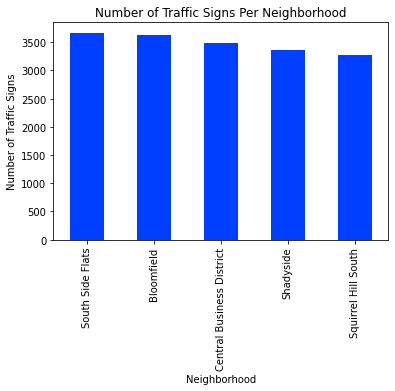

In [22]:
import matplotlib.pyplot as plt

# Plots the data
num_traffic_stops.plot(kind="bar", title = "Number of Traffic Signs Per Neighborhood", xlabel = "Neighborhood", 
                     ylabel = "Number of Traffic Signs", legend =False)


Based on this information we can gather that the "South Side Flats" neighborhood has the most traffic signs, meaning this is the safest neighborhood for children to play in. However, this is only one metric. We will need to look at the rest of our data on the neighborhoods before coming to a final decision on which is the best! To do this, we will use the same point system we used for the previous two datasets. The first three datasets are new to the dictionary so we will add those with the correct points. Squirrel Hill South is already in the dictionary so we will just add one point for that neighborhood.

In [23]:
#Adds neighborhoods and points to the dictionary
points['South Side Flats'] = 5
points['Bloomfield'] = 4
points['Central Business District'] = 3
points['Shadyside'] = 2
points['Squirrel Hill South'] += 1

#Displays the points dictionary
points

{'Squirrel Hill South': 6,
 'Beechview': 4,
 'South Side Slopes': 4,
 'Allegheny Center': 3,
 'Beltzhoover': 3,
 'Highland Park': 3,
 'Sheraden': 3,
 'Mount Washington': 2,
 'Elliott': 3,
 'East Liberty': 2,
 'Hazelwood': 2,
 'Crawford-Roberts': 2,
 'Carrick': 2,
 'South Oakland': 2,
 'Upper Lawrenceville': 2,
 'Homewood North': 5,
 'Allentown': 4,
 'Northview Heights': 3,
 'Knoxville': 2,
 'South Side Flats': 5,
 'Bloomfield': 4,
 'Central Business District': 3,
 'Shadyside': 2}

## The Final Result

Now that we analyzed all of the datasets, gave each neighborhood points based on their place, and placed them into a dictionary, we can now make our results easy to see with a bar graph. We can do this by first converting the dictionary into a data frame and sorting it...

In [24]:
#Converts the points dictionary into a data frame named graph_points
graph_points = pd.DataFrame(points.items(), columns=['Neighborhood', 'Points'])

#sorts graph points
graph_points = graph_points.sort_values("Points", ascending = False)
#Displays each neighborhood with the number of points
graph_points

,Neighborhood,Points
0,Squirrel Hill South,6
15,Homewood North,5
19,South Side Flats,5
2,South Side Slopes,4
20,Bloomfield,4
1,Beechview,4
16,Allentown,4
3,Allegheny Center,3
4,Beltzhoover,3
5,Highland Park,3


Now that all of the neighborhoods are sorted by the number of points they received, we can create a bar graph to visualize the winners...

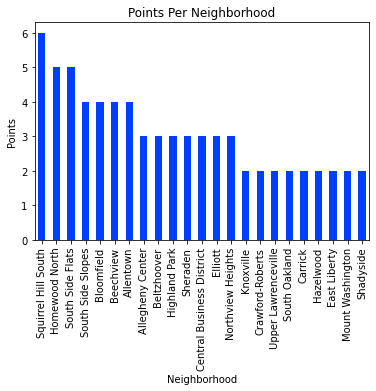

In [25]:
#Creates a bar graph of the points each neighborhood earned
graph_points.plot(kind="bar", x="Neighborhood", ylabel = "Points", title = "Points Per Neighborhood", legend=False)

# And Our Winner is... Squirrel Hill South!!!

Looking at the above bar graph it is clear that Squirrel Hill South is the best neighborhood for a kid to play in. Squirrel Hill South came in first place in the number of playgrounds, offering kids a variety of places to play. Squirrel Hill South also came in 5th place for the most amount of traffic signs, giving kids a safe environment to play in. While Squirrel Hill South did not have the largest ratio of children, Squirrel Hill South did have a large number of children to play with, before taking the overall population into consideration. Squirrel Hill South was also one of only two neighborhoods to be in the top five of more than one category. Based on our data, Squirrel Hill South offers children a safe and fun place to play and is the best neighborhood for children to play in Pittsburgh.

Conclusion (Sreekar): Squirrel Hill is the best neighborhood according to the project and it is indeed a very nice place. I have been there a couple of times, but my personal favorite would be Shadyside. I like how busy it can get and keeps you on your toes. I also do a lot of grocery shopping in that area. It has a 2 on the scale used for our project however.

Conclusion (Austin): I have been to Squirrel Hill South a few different times and I think this is a perfect neighborhood for kids to have fun in. In my experience, this is probably the best neighborhood for kids. I have been to two of the parks in Squirrel Hill South and I have seen many kids at each of them every time I go. Overall, I believe the data we used for this project was accurate in deciding that the best neighborhood for kids to have fun in is Squirrel Hill South.

![](https://i.pinimg.com/736x/65/2f/c8/652fc8e9417150a9ce1cd135ad566828.jpg)